### <b>Import Packages</b>

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.__version__

'0.10.1'

### <b>Import Data</b>

In [3]:
import itc_utils.flight_service as itcfs

readClient = itcfs.get_flight_client()

nb_data_request = {
    'data_name': """Sample Heloc Data.csv""",
    'interaction_properties': {
    }
}

flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)

df_h = itcfs.read_pandas_and_concat(readClient, flightInfo)
df_h.head()


,#year,facility,accountNumber,FICO,BKRPT,recordCount,defaultCount,defaultDate,defaultBalance,cureDate,...,origLTV,origDTI,origCollateralValue,collateralCode,productCode,ID,enteredDate,age,lienPosition,Customer Balance
0,2017,HOF,1,839,973,1,0,None,0,None,...,21.1,50.1,10000,OO01,595,1,3/1/2000,1.2,1,101.1
1,2017,HOS,2,683,483,1,0,None,0,None,...,40,60.2,12000,OO02,595,2,4/1/2012,2,2,201.1
2,2017,HOF,3,775,837,1,0,None,0,None,...,12.1,70.3,11000,OO01,595,3,2/1/2010,3.2,1,302.2
3,2018,HOF,4,None,973,1,0,None,0,None,...,22.2,50.1,10000,OO01,595,4,3/1/2000,3.2,1,95.1
4,2018,HOS,5,695,483,1,0,None,0,None,...,17.9,60.2,12000,OO02,595,5,4/1/2012,4,2,75.5


In [2]:
# df_h = pd.read_csv('/project_data/data_asset/Sample Heloc Data Dummy Values.csv')
# df_h.head()

In [4]:
df_h.columns

Index(['#year', 'facility', 'accountNumber', 'FICO', 'BKRPT', 'recordCount',
       'defaultCount', 'defaultDate', 'defaultBalance', 'cureDate', 'origFICO',
       'origBKRPT', 'faceAmountOfNote', 'vintage', 'origLTV', 'origDTI',
       'origCollateralValue', 'collateralCode', 'productCode', 'ID',
       'enteredDate', 'age', 'lienPosition', 'Customer Balance'],
      dtype='object')

In [4]:
df_h['caPerformanceFlag'] = np.where(pd.isnull(df_h.defaultDate), 0, 1)

In [96]:
df_h

,#year,facility,accountNumber,FICO,BKRPT,recordCount,defaultCount,defaultDate,defaultBalance,cureDate,...,origDTI,origCollateralValue,collateralCode,productCode,ID,enteredDate,age,lienPosition,Customer Balance,caPerformanceFlag
0,2017,HOF,1,839.0,973.0,1,0,NaN,0,NaN,...,50.1,10000,OO01,595,1,3/1/2000,1.2,1,101.1,0
1,2017,HOS,2,683.0,483.0,1,0,NaN,0,NaN,...,60.2,12000,OO02,595,2,4/1/2012,2.0,2,201.1,0
2,2017,HOF,3,775.0,837.0,1,0,NaN,0,NaN,...,70.3,11000,OO01,595,3,2/1/2010,3.2,1,302.2,0
3,2018,HOF,4,NaN,973.0,1,0,NaN,0,NaN,...,50.1,10000,OO01,595,4,3/1/2000,3.2,1,95.1,0
4,2018,HOS,5,695.0,483.0,1,0,NaN,0,NaN,...,60.2,12000,OO02,595,5,4/1/2012,4.0,2,75.5,0
5,2018,HOF,6,751.0,NaN,1,0,NaN,0,NaN,...,70.3,11000,OO01,595,6,2/1/2010,1.8,1,50.2,0


In [59]:
import itc_utils.flight_service as itcfs

readClient = itcfs.get_flight_client()

nb_data_request = {'data_name': """Test_fields_100821_results.csv""", 'interaction_properties': {}}

flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)

df = itcfs.read_pandas_and_concat(readClient, flightInfo)
df.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES
0,0,0,5,0,480,1st,35,6.36,1.272,100000020,RUN,2,0,N,0.989180609,0.010819391,N,0.562406343,0.437593657
1,0,0,9,-7,1050,1st,45,4.756098,0.528455333,100000054,RUN,5,4,N,0.999278473,0.000721527,Y,0.439295772,0.560704228
2,0,2,4,7,600,3rd,5,8.164835,2.04120875,200000049,PASS,4,9,N,0.929719852,0.070280148,Y,0.391968242,0.608031758
3,0,0,11,7,180,1st,45,6.216667,0.565151545,200000041,PASS,4,1,N,0.999941376,5.86E-05,N,0.676802873,0.323197127
4,0,0,1,0,60,1st,45,13.416667,13.416667,200000085,PASS,8,5,N,0.800382789,0.199617211,N,0.60849475,0.39150525


In [9]:
# df = pd.read_csv('/project_data/data_asset/Test_fields_100821_results.csv')
# df.head()

In [60]:
df.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME',
       'TRUEFIELD', 'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'PLAYIDSTR',
       'RUN_PASS', 'CONCEPT_8', 'CONCEPT_9', 'pred_TD', 'prob_TD_NO',
       'prob_TD_YES', 'pred_FIRST', 'prob_FIRST_NO', 'prob_FIRST_YES'],
      dtype='object')

In [7]:
df.shape

(10000, 19)

In [61]:
## To drop variables from a dataframe, simply list the ones you want to keep. Can pass to a new dataframe (as here) or drop from original
df = pd.DataFrame(df, columns=['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST_YES','pred_FIRST','prob_TD_YES','pred_TD'])

In [62]:
## Re-Name columns as needed by casting new column names using the .columns method. New columns names will be applied in order and must be same length as number of existing columns.
df.columns = ['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST','TARGET_1ST','prob_TD','TARGET_TD']

In [63]:
df.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME',
       'TRUEFIELD', 'RUN_PASS', 'CONCEPT_8', 'CONCEPT_9', 'YARDSGAINED_Mean',
       'AVG_OVER_TOGO', 'prob_FIRST', 'TARGET_1ST', 'prob_TD', 'TARGET_TD'],
      dtype='object')

In [31]:
len(df.columns)

16

In [10]:
df.shape

(10000, 16)

### <b>Data Understanding:</b> 
***

In [11]:
df.dtypes

HALF                object
DOWNNUM             object
YARDSTOGO           object
SCOREDIFF           object
TIMELEFT            object
DOWNNAME            object
TRUEFIELD           object
RUN_PASS            object
CONCEPT_8           object
CONCEPT_9           object
YARDSGAINED_Mean    object
AVG_OVER_TOGO       object
prob_FIRST          object
TARGET_1ST          object
prob_TD             object
TARGET_TD           object
dtype: object

In [70]:
df[['HALF','DOWNNUM','YARDSTOGO','SCOREDIFF','TIMELEFT','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO',
       'CONCEPT_8','CONCEPT_9','prob_TD','prob_FIRST']] = df[['HALF','DOWNNUM','YARDSTOGO','SCOREDIFF','TIMELEFT','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO',
       'CONCEPT_8','CONCEPT_9','prob_TD','prob_FIRST']].apply(pd.to_numeric)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HALF              10000 non-null  int64  
 1   DOWNNUM           10000 non-null  int64  
 2   YARDSTOGO         10000 non-null  int64  
 3   SCOREDIFF         10000 non-null  int64  
 4   TIMELEFT          10000 non-null  int64  
 5   DOWNNAME          10000 non-null  object 
 6   TRUEFIELD         10000 non-null  int64  
 7   RUN_PASS          10000 non-null  object 
 8   CONCEPT_8         10000 non-null  int64  
 9   CONCEPT_9         10000 non-null  int64  
 10  YARDSGAINED_Mean  10000 non-null  float64
 11  AVG_OVER_TOGO     10000 non-null  float64
 12  prob_FIRST        10000 non-null  float64
 13  TARGET_1ST        10000 non-null  object 
 14  prob_TD           10000 non-null  float64
 15  TARGET_TD         10000 non-null  object 
dtypes: float64(4), int64(8), object(4)
memory

***
The .describe() function provides a quick breakdown for all numeric variables

In [34]:
df.describe()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,prob_TD
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0,0.990800,5.685600,0.039200,575.178000,27.427000,5.003000,4.378000,8.982165,2.646877,0.541433,0.139750
std,0.0,1.000008,3.167895,5.692144,411.352689,12.938176,2.444952,3.159955,3.585545,2.788894,0.158377,0.287696
min,0.0,0.000000,1.000000,-7.000000,30.000000,5.000000,1.000000,0.000000,3.166667,0.287879,0.133090,0.000000
25%,0.0,0.000000,3.000000,-7.000000,120.000000,15.000000,3.000000,2.000000,5.620000,0.951220,0.423455,0.000343
50%,0.0,0.000000,5.000000,0.000000,600.000000,25.000000,5.000000,3.000000,8.164835,1.632967,0.555977,0.004328
75%,0.0,2.000000,8.000000,7.000000,975.000000,35.000000,7.000000,7.000000,12.420000,2.985612,0.662129,0.067921
max,0.0,2.000000,11.000000,7.000000,1200.000000,45.000000,9.000000,9.000000,16.714286,16.634615,0.899228,1.000000


In [14]:
ytg = df.YARDSTOGO.value_counts()
scdf = df.SCOREDIFF.value_counts()
ti = df.TIMELEFT.value_counts()
tf = df.TRUEFIELD.value_counts()

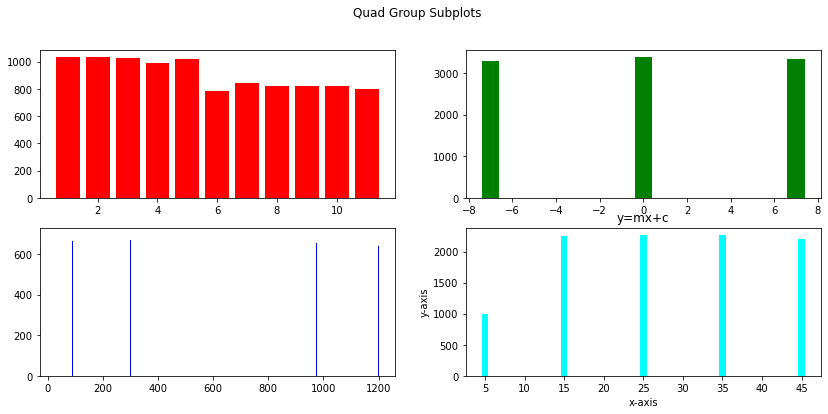

In [23]:
from matplotlib.pyplot import figure

#fig_dims = (14,6)
figure, axs = plt.subplots(2,2)

#plt.figure(figsize=(8, 6))

width = 0.8
figure.suptitle('Quad Group Subplots')

axs[0, 0].bar(ytg.index, ytg, width, label='YdsToGo', color=['red'])
#plt.title('TOP5 countries by pure alcohol consumption', fontsize=25)

axs[0, 1].bar(scdf.index, scdf, width, label='Score Diff', color=['green'])
axs[1, 0].bar(ti.index, ti, width, label='Time Left', color=['blue'])
axs[1, 1].bar(tf.index, tf, width, label='True Field', color=['cyan'])

plt.title("y=mx+c")
plt.xlabel('x-axis')
plt.ylabel('y-axis')

#plt.rcParams["figure.figsize"] = (14, 6)
figure.set_figheight(6)
figure.set_figwidth(14)
plt.show()


In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Crosstabs, Grouping and Aggregates to Understand the Data


In [16]:
pd.crosstab([df['RUN_PASS'], df['CONCEPT_8']], df['CONCEPT_9'])

## By default, crosstabs provide counts
## https://blog.softhints.com/pandas-crosstab-usage-examples/

CONCEPT_9             0    1    2    3   4    5   6    7    8    9
RUN_PASS CONCEPT_8                                                
PASS     4            7   86  314   57  12   20  16  106   21  349
         5            0   40  107   82   2  227  20  296   46  210
         6          132   94   43   55  10  104  70  347   27  141
         7           63  201  146  300  23    8   3  106   62   74
         8            0  280   17  252  34  288   0   36    0  104
         9          276  218   69   16   2    0   0   51   33  321
RUN      1          210  104  117  164   1  124  30   87   12  165
         2          123  180   39   99  11    7   4   33   13  465
         3          103   89  118  191  45   80  36   67  130  129
         5           54  150  246  310  85  152   0    0    0    3

In [11]:
pd.crosstab([df['RUN_PASS'], df['CONCEPT_8']], df['CONCEPT_9'], margins=True,  normalize='index') ## normalize = 'columns' or 'all'

# https://blog.softhints.com/pandas-crosstab-usage-examples/

CONCEPT_9                  0         1         2         3         4  \
RUN_PASS CONCEPT_8                                                     
PASS     4          0.007085  0.087045  0.317814  0.057692  0.012146   
         5          0.000000  0.038835  0.103883  0.079612  0.001942   
         6          0.129032  0.091887  0.042033  0.053763  0.009775   
         7          0.063895  0.203854  0.148073  0.304260  0.023327   
         8          0.000000  0.276954  0.016815  0.249258  0.033630   
         9          0.279919  0.221095  0.069980  0.016227  0.002028   
RUN      1          0.207101  0.102564  0.115385  0.161736  0.000986   
         2          0.126283  0.184805  0.040041  0.101643  0.011294   
         3          0.104251  0.090081  0.119433  0.193320  0.045547   
         5          0.054000  0.150000  0.246000  0.310000  0.085000   
All                 0.096800  0.144200  0.121600  0.152600  0.022500   

CONCEPT_9                  5         6         7         8         9  
RUN_PASS CONCEPT_8                                                    
PASS     4          0.020243  0.016194  0.107287  0.021255  0.353239  
         5          0.220388  0.019417  0.287379  0.044660  0.203883  
         6          0.101662  0.068426  0.339198  0.026393  0.137830  
         7          0.008114  0.003043  0.107505  0.062880  0.075051  
         8          0.284866  0.000000  0.035608  0.000000  0.102868  
         9          0.000000  0.000000  0.051724  0.033469  0.325558  
RUN      1          0.122288  0.029586  0.085799  0.011834  0.162722  
         2          0.007187  0.004107  0.033881  0.013347  0.477413  
         3          0.080972  0.036437  0.067814  0.131579  0.130567  
         5          0.152000  0.000000  0.000000  0.000000  0.003000  
All                 0.101000  0.017900  0.112900  0.034400  0.196100

In [18]:
pd.crosstab([df['RUN_PASS'], df['CONCEPT_8']], df['CONCEPT_9'], values=df.prob_FIRST_YES, aggfunc=np.mean)

## Can apply summaries for other variables by specifying those as 'values' and calling numpy aggregate functions 

CONCEPT_9                  0         1         2         3         4  \
RUN_PASS CONCEPT_8                                                     
PASS     4          0.546797  0.470619  0.505639  0.557598  0.648914   
         5               NaN  0.393412  0.563234  0.523591  0.550004   
         6          0.517521  0.587531  0.618216  0.569165  0.524173   
         7          0.628358  0.527993  0.536636  0.529891  0.475218   
         8               NaN  0.543074  0.572396  0.558026  0.613785   
         9          0.546427  0.594617  0.545703  0.543774  0.502702   
RUN      1          0.570897  0.530134  0.509881  0.551171  0.813844   
         2          0.583935  0.583732  0.438286  0.545454  0.345021   
         3          0.452748  0.541547  0.554815  0.561573  0.464150   
         5          0.616631  0.551863  0.554867  0.500423  0.541839   

CONCEPT_9                  5         6         7         8         9  
RUN_PASS CONCEPT_8                                                    
PASS     4          0.558600  0.641849  0.541547  0.525917  0.551219  
         5          0.584390  0.634312  0.536350  0.577074  0.493472  
         6          0.585830  0.441293  0.555412  0.475933  0.548329  
         7          0.349431  0.413092  0.553093  0.561678  0.515232  
         8          0.541586       NaN  0.643208       NaN  0.506313  
         9               NaN       NaN  0.470888  0.616705  0.507114  
RUN      1          0.591321  0.660973  0.520312  0.531941  0.541824  
         2          0.492765  0.352425  0.608392  0.501126  0.525419  
         3          0.510658  0.617854  0.596109  0.556202  0.583153  
         5          0.476699       NaN       NaN       NaN  0.419287

In [25]:
df.sort_values(by='prob_FIRST', ascending=False)

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,TARGET_1ST,prob_TD,TARGET_TD
523,0,2,2,7,30,3rd,45,PASS,8,9,12.420000,6.210000,0.899228,Y,1.230000e-04,N
3711,0,2,1,0,30,3rd,45,PASS,6,7,13.196296,13.196296,0.896892,Y,0.000000e+00,N
1260,0,2,1,-7,1200,3rd,45,PASS,9,0,14.309091,14.309091,0.875825,Y,8.100000e-06,N
4554,0,2,1,-7,975,3rd,45,RUN,3,8,5.483871,5.483871,0.875176,Y,0.000000e+00,N
5333,0,2,5,7,720,3rd,45,RUN,5,5,4.756098,0.951220,0.868119,Y,4.810000e-02,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,0,2,3,-7,1140,3rd,25,PASS,4,9,8.164835,2.721612,0.140631,N,2.545386e-02,N
8485,0,0,11,0,120,1st,45,PASS,4,1,6.216667,0.565152,0.139710,N,1.370000e-05,N
2115,0,2,11,0,1050,3rd,35,RUN,5,5,4.756098,0.432373,0.139551,N,7.440000e-06,N
9334,0,0,7,0,30,1st,45,PASS,9,9,15.638177,2.234025,0.136213,N,1.360000e-29,N


In [28]:
df.sort_values(by=['RUN_PASS','prob_FIRST'],ascending=False)

## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,TARGET_1ST,prob_TD,TARGET_TD
4554,0,2,1,-7,975,3rd,45,RUN,3,8,5.483871,5.483871,0.875176,Y,0.000000e+00,N
3674,0,2,1,7,180,3rd,15,RUN,1,0,5.620000,5.620000,0.868119,Y,4.812235e-02,N
5333,0,2,5,7,720,3rd,45,RUN,5,5,4.756098,0.951220,0.868119,Y,4.810000e-02,N
6632,0,2,1,7,180,3rd,5,RUN,1,0,5.620000,5.620000,0.867044,Y,5.583372e-01,Y
2564,0,2,1,0,120,3rd,35,RUN,3,1,5.620000,5.620000,0.856730,Y,6.531784e-01,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,0,0,11,-7,300,1st,45,PASS,4,1,6.216667,0.565152,0.141238,N,6.020000e-06,N
1916,0,2,3,-7,1140,3rd,25,PASS,4,9,8.164835,2.721612,0.140631,N,2.545386e-02,N
8485,0,0,11,0,120,1st,45,PASS,4,1,6.216667,0.565152,0.139710,N,1.370000e-05,N
9334,0,0,7,0,30,1st,45,PASS,9,9,15.638177,2.234025,0.136213,N,1.360000e-29,N


In [26]:
df

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,TARGET_1ST,prob_TD,TARGET_TD
0,0,0,5,0,480,1st,35,RUN,2,0,6.360000,1.272000,0.437594,N,0.010819,N
1,0,0,9,-7,1050,1st,45,RUN,5,4,4.756098,0.528455,0.560704,Y,0.000722,N
2,0,2,4,7,600,3rd,5,PASS,4,9,8.164835,2.041209,0.608032,Y,0.070280,N
3,0,0,11,7,180,1st,45,PASS,4,1,6.216667,0.565152,0.323197,N,0.000059,N
4,0,0,1,0,60,1st,45,PASS,8,5,13.416667,13.416667,0.391505,N,0.199617,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,5,0,30,3rd,35,RUN,1,9,6.430769,1.286154,0.467382,N,0.995011,Y
9996,0,2,11,-7,1200,3rd,35,PASS,8,5,13.416667,1.219697,0.294593,N,0.000247,N
9997,0,2,4,0,1050,3rd,25,RUN,3,3,6.005976,1.501494,0.612723,Y,0.262691,N
9998,0,2,2,7,900,3rd,5,PASS,4,9,8.164835,4.082418,0.603927,Y,0.434928,N


#### Creating classes in the data

In [64]:
df['probBIN_3'] = pd.cut(df('prob_FIRST','', 5))

TypeError: 'DataFrame' object is not callable

In [30]:
## The .qcut method defaults to provide bins of equal SIZE

df['probBIN_5'] = pd.qcut(df.prob_FIRST, q=5, labels=['0','1','2','3','4'])

In [31]:
## The .cut method defaults to provide bins of equal WIDTH based on the MIN and MAX values!!

df['probBIN_Quint'] = pd.cut(df.prob_FIRST, bins=5, labels=['1-Bottom','2-Low','3-Middle','4-High','5-Top'])

In [32]:
df['probBIN_Vint'] = pd.cut(df.prob_FIRST, bins=20, labels=False)

In [11]:
#cut_series, cut_intervals = pd.cut(df.prob_FIRST, bins=20, labels=False, retbins=True)

In [33]:
cut_series, cut_intervals = pd.cut(df.prob_FIRST, bins=20, labels=False, retbins=True)

print("Cut series:")
print(cut_series.head(2))
print()
print("Cut intervals: ", cut_intervals)

Cut series:
0     7
1    11
Name: prob_FIRST, dtype: int64

Cut intervals:  [0.13232377 0.1713968  0.20970368 0.24801057 0.28631746 0.32462434
 0.36293123 0.40123811 0.439545   0.47785189 0.51615877 0.55446566
 0.59277255 0.63107943 0.66938632 0.70769321 0.74600009 0.78430698
 0.82261387 0.86092075 0.89922764]


In [15]:
df['probTOP_4'] = pd.cut(df.prob_FIRST_YES, bins=[0.00, 0.50, 0.75, 0.8, 0.85, 1.00], include_lowest=True)

In [ ]:
#df['probBIN'] = pd.qcut(df('prob_FIRST_YES','', 5))

In [ ]:
df.groupby('name').describe()

In [14]:
df.groupby('probBIN_5')['prob_FIRST_YES'].describe()

,count,mean,std,min,25%,50%,75%,max
probBIN_5,,,,,,,,
0,2001.0,0.305764,0.065964,0.133090,0.259506,0.318272,0.361240,0.396818
1,1999.0,0.453357,0.033959,0.396840,0.423455,0.451420,0.483904,0.510912
2,2000.0,0.557001,0.027450,0.510956,0.533658,0.555977,0.581367,0.605114
3,2000.0,0.642229,0.023006,0.605121,0.623370,0.639508,0.662129,0.685949
4,2000.0,0.748887,0.043113,0.685951,0.713633,0.742913,0.779284,0.899228


In [16]:
df.groupby('probTOP_4')['prob_FIRST_YES'].describe()

,count,mean,std,min,25%,50%,75%,max
probTOP_4,,,,,,,,
"(-0.001, 0.5]",3760.0,0.371480,0.087429,0.133090,0.311887,0.390030,0.442792,0.499984
"(0.5, 0.75]",5352.0,0.619694,0.068875,0.500016,0.560386,0.621007,0.674931,0.749989
"(0.75, 0.8]",614.0,0.773533,0.014072,0.750048,0.761142,0.772295,0.785264,0.799933
"(0.8, 0.85]",246.0,0.820512,0.014177,0.800041,0.807817,0.818700,0.831075,0.849743
"(0.85, 1.0]",28.0,0.863059,0.012138,0.850692,0.855429,0.856849,0.867617,0.899228


In [21]:
df.groupby('probBIN_Quint')['prob_FIRST_YES'].describe()

,count,mean,std,min,25%,50%,75%,max
probBIN_Quint,,,,,,,,
1-Bottom,684.0,0.227824,0.039397,0.133090,0.195254,0.233264,0.261685,0.286289
2-Low,2079.0,0.372309,0.043264,0.286794,0.334941,0.378053,0.408977,0.439345
3-Middle,2974.0,0.519390,0.043514,0.439578,0.484838,0.522264,0.555821,0.592612
4-High,3312.0,0.661750,0.042941,0.592821,0.625038,0.654905,0.697016,0.745992
5-Top,951.0,0.786631,0.029378,0.746066,0.762965,0.780971,0.804392,0.899228


In [18]:
df.groupby('probBIN_Vint')['prob_FIRST_YES'].describe()

,count,mean,std,min,25%,50%,75%,max
probBIN_Vint,,,,,,,,
0,72.0,0.156781,0.010088,0.133090,0.150607,0.157495,0.164311,0.171006
1,148.0,0.190769,0.010636,0.171574,0.184247,0.190834,0.198737,0.209580
2,219.0,0.230487,0.010947,0.209711,0.221176,0.230957,0.239521,0.247769
3,245.0,0.268704,0.011548,0.248169,0.259506,0.268547,0.279477,0.286289
4,410.0,0.307798,0.010855,0.286794,0.299413,0.308207,0.317303,0.324597
5,432.0,0.344668,0.011081,0.324673,0.334735,0.345517,0.354736,0.362903
6,572.0,0.383967,0.011767,0.362960,0.373508,0.385679,0.394660,0.401208
7,665.0,0.420010,0.011119,0.401305,0.410320,0.419356,0.429334,0.439345
8,657.0,0.457362,0.010659,0.439578,0.448305,0.457366,0.466314,0.477559


In [118]:
bars1 = df.groupby(['probBIN_Quint'])['prob_FIRST_YES'].mean()
bars1

probBIN_Quint
1-Bottom    0.227824
2-Low       0.372309
3-Middle    0.519390
4-High      0.661750
5-Top       0.786631
Name: prob_FIRST_YES, dtype: float64

In [126]:
bars1 = df.groupby('probBIN_Quint', as_index=False)[['prob_FIRST_YES']].mean()
bars1

,probBIN_Quint,prob_FIRST_YES
0,1-Bottom,0.227824
1,2-Low,0.372309
2,3-Middle,0.519390
3,4-High,0.661750
4,5-Top,0.786631


In [ ]:
# produces Pandas Series
data.groupby('month')['duration'].sum() 
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()

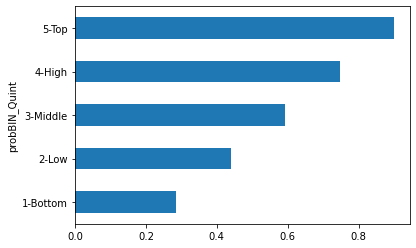

In [22]:
import matplotlib.pyplot as plt

#df['probBIN_Quint'].value_counts().plot(kind='barh')

df.groupby('probBIN_Quint')['prob_FIRST_YES'].max().plot(kind='barh')#, label=True)
plt.show()

In [216]:
agg_df = df.groupby(['probBIN_Quint','RUN_PASS']).agg({'prob_FIRST_YES':['mean', 'std']})
agg_df

prob_FIRST_YES          
                                 mean       std
probBIN_Quint RUN_PASS                         
1-Bottom      PASS           0.225680  0.039481
              RUN            0.230807  0.039154
2-Low         PASS           0.373133  0.043101
              RUN            0.371030  0.043510
3-Middle      PASS           0.520060  0.043531
              RUN            0.518343  0.043484
4-High        PASS           0.660437  0.043127
              RUN            0.663689  0.042608
5-Top         PASS           0.787051  0.030228
              RUN            0.785993  0.028069

In [217]:
agg_df = agg_df.reset_index()
agg_df

probBIN_Quint RUN_PASS prob_FIRST_YES          
                                   mean       std
0      1-Bottom     PASS       0.225680  0.039481
1      1-Bottom      RUN       0.230807  0.039154
2         2-Low     PASS       0.373133  0.043101
3         2-Low      RUN       0.371030  0.043510
4      3-Middle     PASS       0.520060  0.043531
5      3-Middle      RUN       0.518343  0.043484
6        4-High     PASS       0.660437  0.043127
7        4-High      RUN       0.663689  0.042608
8         5-Top     PASS       0.787051  0.030228
9         5-Top      RUN       0.785993  0.028069

In [109]:
df.groupby(['probBIN_Quint','RUN_PASS'], as_index=False).agg({"prob_FIRST_YES": "mean"})

## Using the as_index parameter while Grouping data in pandas prevents setting a row index on the result.
## https://pbpython.com/groupby-agg.html

,probBIN_Quint,RUN_PASS,prob_FIRST_YES
0,1-Bottom,PASS,0.225680
1,1-Bottom,RUN,0.230807
2,2-Low,PASS,0.373133
3,2-Low,RUN,0.371030
4,3-Middle,PASS,0.520060
5,3-Middle,RUN,0.518343
6,4-High,PASS,0.660437
7,4-High,RUN,0.663689
8,5-Top,PASS,0.787051
9,5-Top,RUN,0.785993


In [111]:
bars1 = pd.DataFrame(df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'], as_index=False)['prob_FIRST_YES'].mean())
bars1

,probBIN_Quint,RUN_PASS,prob_FIRST_YES
0,1-Bottom,RUN,0.230807
1,2-Low,RUN,0.371030
2,3-Middle,RUN,0.518343
3,4-High,RUN,0.663689
4,5-Top,RUN,0.785993


In [133]:
yer1 = [0.5, 0.4, 0.5]
yer1

[0.5, 0.4, 0.5]

In [178]:
bars1 = df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'], as_index=False)['prob_FIRST_YES'].mean()
bars1

,probBIN_Quint,RUN_PASS,prob_FIRST_YES
0,1-Bottom,RUN,0.230807
1,2-Low,RUN,0.371030
2,3-Middle,RUN,0.518343
3,4-High,RUN,0.663689
4,5-Top,RUN,0.785993


In [214]:
sd_df = pd.DataFrame(df.groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].std(ddof=0))
sd_df

prob_FIRST_YES
probBIN_Quint RUN_PASS                
1-Bottom      PASS            0.039432
              RUN             0.039085
2-Low         PASS            0.043084
              RUN             0.043483
3-Middle      PASS            0.043519
              RUN             0.043465
4-High        PASS            0.043116
              RUN             0.042592
5-Top         PASS            0.030201
              RUN             0.028032

In [190]:
#sd_df.columns= ['_'.join(x) for x in list(zip(sd_df.columns.get_level_values(0), sd_df.columns.get_level_values(0)))]
sd_df = sd_df.reset_index()
sd_df

,probBIN_Quint,RUN_PASS,FIRST_mean,FIRST_std
0,1-Bottom,PASS,0.039481,0.039481
1,1-Bottom,RUN,0.039154,0.039154
2,2-Low,PASS,0.043101,0.043101
3,2-Low,RUN,0.043510,0.043510
4,3-Middle,PASS,0.043531,0.043531
5,3-Middle,RUN,0.043484,0.043484
6,4-High,PASS,0.043127,0.043127
7,4-High,RUN,0.042608,0.042608
8,5-Top,PASS,0.030228,0.030228
9,5-Top,RUN,0.028069,0.028069


In [ ]:
d_avg.groupby(['year', 'month'], as_index=False)['conc'].std(ddof=0) 

In [141]:
yer1 = pd.DataFrame(df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].std())
yer1

,,prob_FIRST_YES
probBIN_Quint,RUN_PASS,
1-Bottom,RUN,0.039154
2-Low,RUN,0.043510
3-Middle,RUN,0.043484
4-High,RUN,0.042608
5-Top,RUN,0.028069


In [23]:
bars1 = df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].mean()
bars1

probBIN_Quint  RUN_PASS
1-Bottom       RUN         0.230807
2-Low          RUN         0.371030
3-Middle       RUN         0.518343
4-High         RUN         0.663689
5-Top          RUN         0.785993
Name: prob_FIRST_YES, dtype: float64

In [219]:
yer1 = df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].std()
yer1

probBIN_Quint  RUN_PASS
1-Bottom       RUN         0.039154
2-Low          RUN         0.043510
3-Middle       RUN         0.043484
4-High         RUN         0.042608
5-Top          RUN         0.028069
Name: prob_FIRST_YES, dtype: float64

In [20]:
bars1 = pd.DataFrame(df.groupby(['probBIN_Quint','RUN_PASS'], as_index=False)['prob_FIRST_YES'].mean())
#bars1.get_group('RUN')
#bars1[bars1['RUN_PASS']> 0.50] #filter(lambda x: x['prob_FIRST_YES'].mean() > 0.50)

#bars1.apply(lambda g: g[g['RUN_PASS'] == 'RUN']).reset_index(drop=True).groupby(bars1.grouper.names) 
bars1
#bars1

,probBIN_Quint,RUN_PASS,prob_FIRST_YES
0,1-Bottom,PASS,0.225680
1,1-Bottom,RUN,0.230807
2,2-Low,PASS,0.373133
3,2-Low,RUN,0.371030
4,3-Middle,PASS,0.520060
5,3-Middle,RUN,0.518343
6,4-High,PASS,0.660437
7,4-High,RUN,0.663689
8,5-Top,PASS,0.787051
9,5-Top,RUN,0.785993


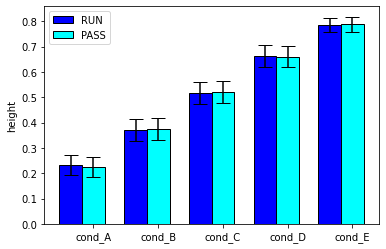

In [23]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# width of the bars
barWidth = 0.35
 
# Choose the height of the blue bars
bars1 = df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].mean()

# Choose the height of the cyan bars
bars2 = df[df.RUN_PASS == 'PASS'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].mean()
 
# Choose the height of the error bars (bars1)
yer1 = df[df.RUN_PASS == 'RUN'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].std()
 
# Choose the height of the error bars (bars2)
yer2 = df[df.RUN_PASS == 'PASS'].groupby(['probBIN_Quint','RUN_PASS'])['prob_FIRST_YES'].std()
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
#plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='RUN')
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='RUN')
 
# Create cyan bars
#plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='PASS')
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='PASS')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C', 'cond_D', 'cond_E'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

In [ ]:
bars1 = [10, 9, 2]
bars2 = [10.8, 9.5, 4.5]
bars1, bars2

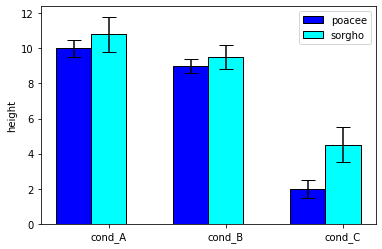

In [114]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

In [31]:
df.groupby('probBIN_5').mean()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST_YES
probBIN_5,,,,,,,,,,,
0,0.0,0.673663,8.215892,-0.108446,584.700150,29.077961,4.988006,4.511744,8.886740,1.616126,0.305764
4,0.0,1.088544,6.835918,0.266133,565.137569,27.371186,5.000500,4.285143,8.920943,1.823356,0.453357
3,0.0,1.038000,5.584500,-0.266000,579.150000,26.640000,5.097500,4.436500,9.099487,2.186349,0.557001
2,0.0,0.985000,4.396500,-0.052500,571.890000,27.025000,5.024000,4.421000,8.942233,2.993145,0.642229
1,0.0,1.169000,3.394500,0.357000,575.002500,27.020000,4.905000,4.235500,9.061438,4.615513,0.748887


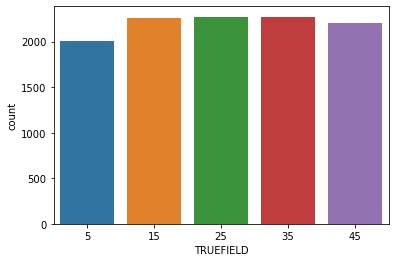

In [117]:
import seaborn as sns

#sns.set_theme(style="whitegrid")

ax = sns.countplot(x="probBIN_5", data=df)
ax = sns.countplot(x="TRUEFIELD", data=df)

### Distribution Plots help us understand the shape of the data. Example is a normal distribution

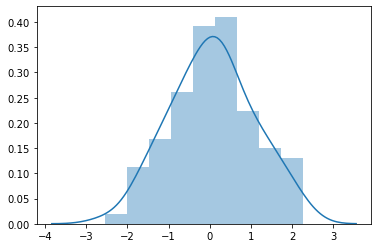

In [24]:
import seaborn as sns, numpy as np

#sns.set_theme(); 
np.random.seed(0)

x = np.random.randn(100)

ax = sns.distplot(x)

### We first want to look at distribution of potential dependent variables

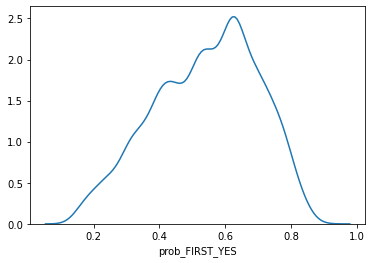

In [25]:
#data = sns.load_dataset("df")

x = df.prob_FIRST_YES
y = df.prob_TD_YES

sns.distplot(x, kde=True, hist=False)

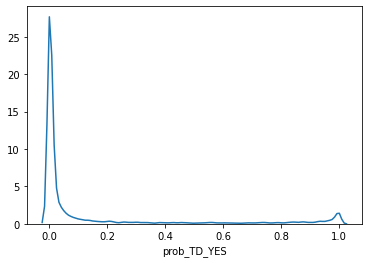

In [26]:
sns.distplot(y, kde=True, hist=False)

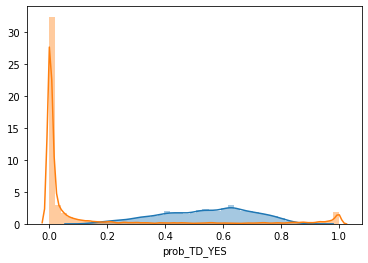

In [27]:
sns.distplot(x,hist=True)
sns.distplot(y,hist=True)

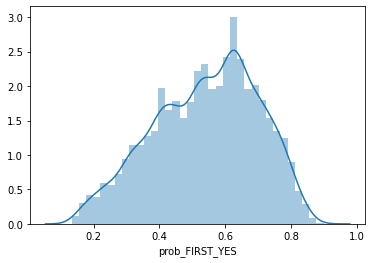

In [42]:
#sns.displot(diamonds, x="carat", kde=True)
sns.distplot(x, kde=True)

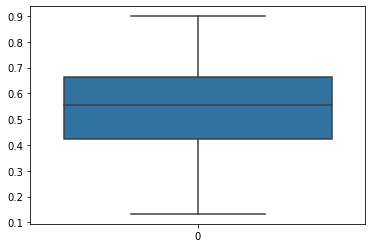

In [28]:
# Boxplot
sns.boxplot(data=df.prob_FIRST_YES)

In [46]:
# Set theme
sns.set_style('whitegrid')

### Violin Plots can show the shape of the distribution across multiple sub-classes

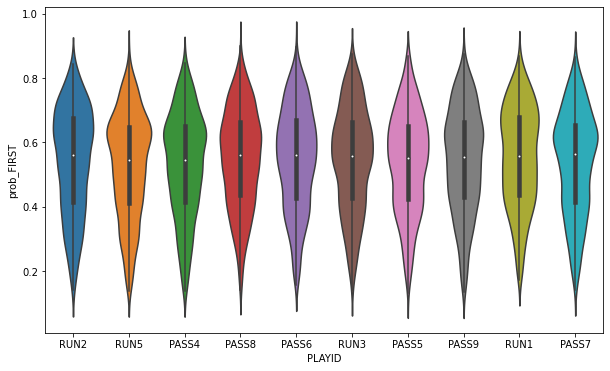

In [71]:
# Violin plot
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
df['PLAYID'] = df['RUN_PASS'] + df['CONCEPT_8'].astype(str)
sns.violinplot(x=df.PLAYID, y=df.prob_FIRST)

In [93]:
#df.PLAYID.nunique()

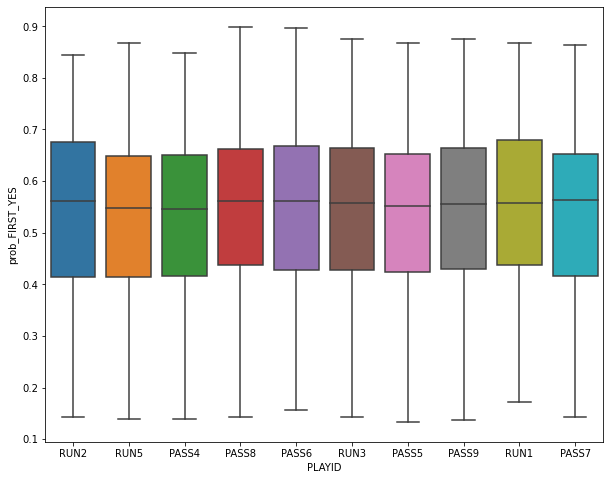

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.PLAYID, y=df.prob_FIRST)

In [72]:
data = df.groupby(["PLAYID"])

In [73]:
df.groupby(["PLAYID"]).head(2)

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,TARGET_1ST,prob_TD,TARGET_TD,PLAYID
0,0,0,5,0,480,1st,35,RUN,2,0,6.360000,1.272000,0.437594,N,1.081939e-02,N,RUN2
1,0,0,9,-7,1050,1st,45,RUN,5,4,4.756098,0.528455,0.560704,Y,7.215270e-04,N,RUN5
2,0,2,4,7,600,3rd,5,PASS,4,9,8.164835,2.041209,0.608032,Y,7.028015e-02,N,PASS4
3,0,0,11,7,180,1st,45,PASS,4,1,6.216667,0.565152,0.323197,N,5.860000e-05,N,PASS4
4,0,0,1,0,60,1st,45,PASS,8,5,13.416667,13.416667,0.391505,N,1.996172e-01,N,PASS8
5,0,2,1,-7,1200,3rd,35,PASS,8,1,12.420000,12.420000,0.757293,Y,3.460000e-02,N,PASS8
6,0,2,1,7,1140,3rd,5,PASS,6,2,13.160000,13.160000,0.802157,Y,8.118849e-02,N,PASS6
7,0,2,7,7,60,3rd,45,RUN,3,1,5.620000,0.802857,0.453857,N,7.130000e-06,N,RUN3
8,0,2,2,-7,720,3rd,45,RUN,2,0,6.360000,3.180000,0.791439,Y,1.520000e-05,N,RUN2
10,0,0,9,7,1140,1st,15,PASS,6,0,13.088670,1.454297,0.507527,Y,1.829470e-04,N,PASS6


In [39]:
print("number of groups:",data.ngroups)
data.groups

number of groups: 10


{'PASS4': Int64Index([   2,    3,   20,   38,   41,   44,   61,   77,   96,  100,
             ...
             9893, 9897, 9903, 9925, 9930, 9951, 9960, 9972, 9980, 9998],
            dtype='int64', length=988),
 'PASS5': Int64Index([  14,   15,   50,   59,  113,  117,  120,  123,  126,  141,
             ...
             9896, 9912, 9923, 9928, 9929, 9931, 9962, 9969, 9975, 9978],
            dtype='int64', length=1030),
 'PASS6': Int64Index([   6,   10,   29,   37,   62,   72,   79,  101,  102,  103,
             ...
             9909, 9913, 9920, 9924, 9954, 9955, 9961, 9965, 9977, 9999],
            dtype='int64', length=1023),
 'PASS7': Int64Index([  30,   43,   45,   49,   65,   75,   82,  109,  112,  115,
             ...
             9921, 9933, 9941, 9948, 9949, 9976, 9979, 9987, 9989, 9990],
            dtype='int64', length=986),
 'PASS8': Int64Index([   4,    5,   11,   12,   18,   26,   34,   40,   54,   63,
             ...
             9901, 9911, 9918, 9927, 9934, 9937

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


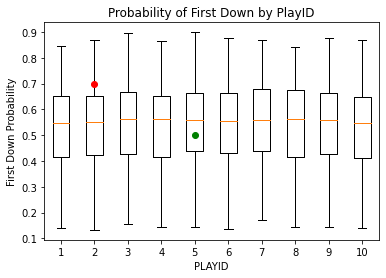

In [48]:
# boxplot for PlayID, probability of first down with each yard to go
fig1, ax1 = plt.subplots()
ax1.set_title('Probability of First Down by PlayID')
bp_data = []

for d in data.groups:
    playid = d
    prob_FIRST = data.get_group(playid)
    bp_data.append(prob_FIRST['prob_FIRST'].values)
#     print(d, prob_FIRST_YES['prob_FIRST_YES'].values)
#     print()
ax1.boxplot(bp_data)
plt.xlabel("PLAYID")
plt.ylabel("First Down Probability")

# Additional Points
plt.plot(5, 0.5, 'go') # add green dot to yardtogo=5 and prob_FIRST_YES=0.5
plt.plot(2, 0.7, 'ro') # add red dot to yardtogo=2 and prob_FIRST_YES=0.7

plt.show()

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)

# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

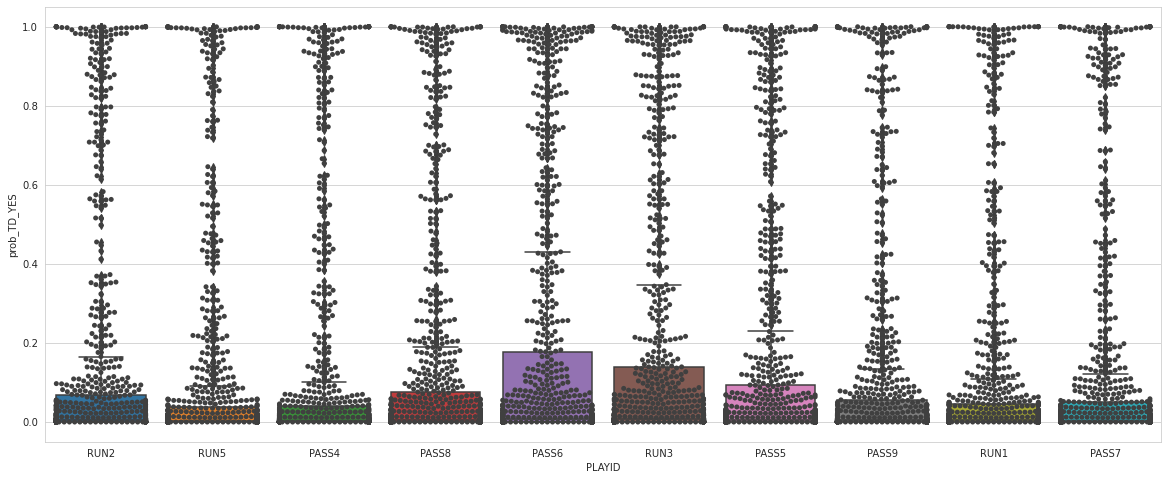

In [56]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=df.PLAYID, y=df.prob_TD_YES)

ax = sns.swarmplot(x=df.PLAYID, y=df.prob_TD_YES, color=".25")

<Figure size 720x432 with 0 Axes>

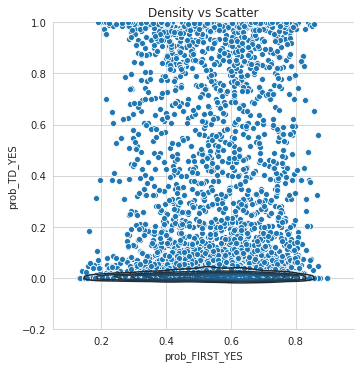

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('Pokemon.csv', encoding='ISO-8859-1')

# plot
plt.figure(figsize=(10,6))
sns.relplot(x='prob_FIRST_YES', y='prob_TD_YES', data=df)
sns.kdeplot(df.prob_FIRST_YES, df.prob_TD_YES)
plt.ylim(-0.2, 1.0)
plt.title('Density vs Scatter');

In [ ]:
prob_df = df[['prob_FIRST_YES','prob_TD_YES']]
prob_df.head()

In [75]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()
scaler.fit(prob_df)
scale_df = pd.DataFrame(scaler.transform(prob_df))
scale_df.columns = ['FIRST','TD']
scale_df

,FIRST,TD
0,-0.655679,-0.448172
1,0.121686,-0.483273
2,0.420529,-0.241483
3,-1.378020,-0.485577
4,-0.946698,0.208102
...,...,...
9995,-0.467587,2.972943
9996,-1.558635,-0.484924
9997,0.450149,0.427351
9998,0.394612,1.026059


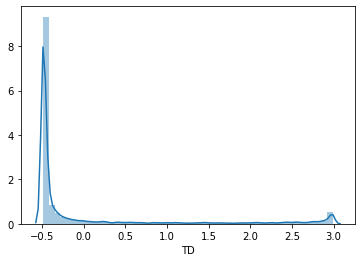

In [81]:
p = scale_df.FIRST
q = scale_df.TD

sns.distplot(q, kde=True, hist=True)


(-1.0, 1.0)

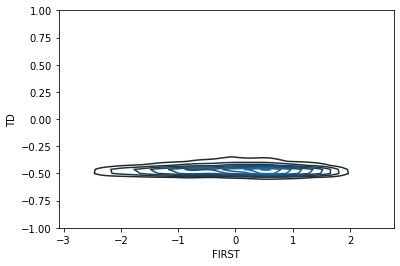

In [78]:
blobb = sns.kdeplot(scale_df.FIRST, scale_df.TD)
#gfg = sns.boxplot(x="day", y="total_bill", data=tips)
blobb.set_ylim(-1, 1)

In [82]:
from sklearn.preprocessing import RobustScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

robust = RobustScaler()
robust.fit(prob_df)
Robust_df = pd.DataFrame(robust.transform(prob_df))
Robust_df.columns = ['FIRST','TD']
Robust_df

,FIRST,TD
0,-0.496005,0.096061
1,0.019808,-0.053363
2,0.218102,0.975938
3,-0.975307,-0.063173
4,-0.689107,2.889816
...,...,...
9995,-0.371198,14.659736
9996,-1.095152,-0.060392
9997,0.237756,3.823159
9998,0.200905,6.371859


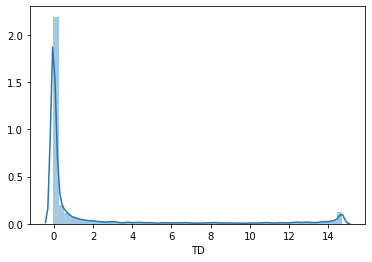

In [85]:
r = Robust_df.FIRST
s = Robust_df.TD

sns.distplot(s, kde=True, hist=True)

In [87]:
from sklearn.preprocessing import MinMaxScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

minmax = MinMaxScaler()
minmax.fit(prob_df)
Minmax_df = pd.DataFrame(minmax.transform(prob_df))
Minmax_df.columns = ['FIRST','TD']
Minmax_df

,FIRST,TD
0,0.397453,0.010819
1,0.558143,0.000722
2,0.619917,0.070280
3,0.248137,0.000059
4,0.337296,0.199617
...,...,...
9995,0.436334,0.995011
9996,0.210802,0.000247
9997,0.626040,0.262691
9998,0.614560,0.434928


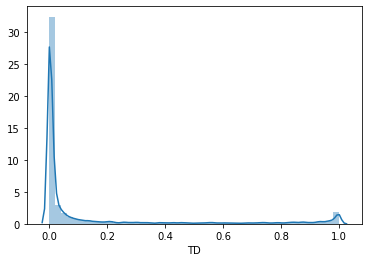

In [89]:
m = Minmax_df.FIRST
n = Minmax_df.TD

sns.distplot(n, kde=True, hist=True)

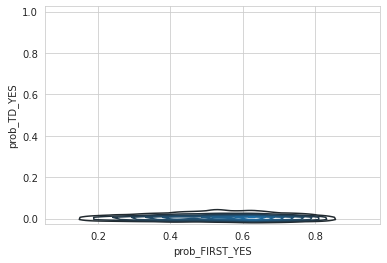

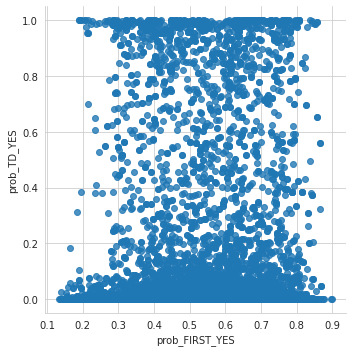

In [87]:
sns.kdeplot(df.prob_FIRST_YES, df.prob_TD_YES)
sns.lmplot(x='prob_FIRST_YES', y='prob_TD_YES', data=df, fit_reg=False)

In [33]:
x = df.prob_FIRST_YES
y = df.prob_TD_YES

(<seaborn.axisgrid.FacetGrid at 0x7fff72a21710>,)

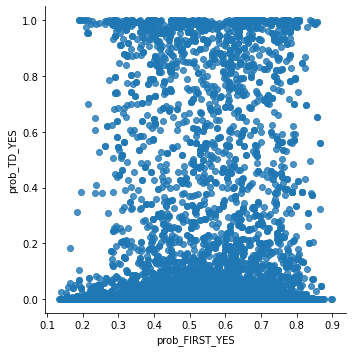

In [36]:
# Scatterplot arguments
sns.lmplot(x='prob_FIRST_YES', y='prob_TD_YES', data=df,
           fit_reg=False), # No regression line
#           hue='Stage')   # Color by evolution stage

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

## <b>Data Selection for Model Build</b>

#### Create any needed new variables before splitting data for modeling

In [86]:
df['TSHIRT'] = "" 
#    print(len(data))
for i in range(len(df)):
    if df['YARDSTOGO'].iloc[i] <= 3:
        df['TSHIRT'].iloc[i] = "SMALL"
    elif df['YARDSTOGO'].iloc[i] <= 6:
        df['TSHIRT'].iloc[i] = "MEDIUM"
    elif df['YARDSTOGO'].iloc[i] <= 10:
        df['TSHIRT'].iloc[i] = "LONG"  
    elif df['YARDSTOGO'].iloc[i] > 10:
        df['TSHIRT'].iloc[i] = "XLONG" 
    else: df['TSHIRT'].iloc[i] = "NONE" 

In [87]:
df.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME',
       'TRUEFIELD', 'RUN_PASS', 'CONCEPT_8', 'CONCEPT_9', 'YARDSGAINED_Mean',
       'AVG_OVER_TOGO', 'prob_FIRST', 'TARGET_1ST', 'prob_TD', 'TARGET_TD',
       'PLAYID', 'TSHIRT', 'STRAT_1ST', 'STRAT_TD'],
      dtype='object')

In [44]:
df_numeric = df.select_dtypes(include=[np.number])

In [45]:
df_numeric.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'TRUEFIELD',
       'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'CONCEPT_8', 'CONCEPT_9',
       'prob_TD_NO', 'prob_TD_YES', 'prob_FIRST_NO', 'prob_FIRST_YES'],
      dtype='object')

In [88]:
df_TD = pd.DataFrame(df, columns=['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'TRUEFIELD', 'RUN_PASS','YARDSGAINED_Mean', 'AVG_OVER_TOGO','PLAYID','TSHIRT'])

In [76]:
df_TD.shape

(10000, 10)

In [89]:
df_TD.dtypes

HALF                  int64
DOWNNUM               int64
YARDSTOGO             int64
SCOREDIFF             int64
TIMELEFT              int64
TRUEFIELD             int64
RUN_PASS             object
YARDSGAINED_Mean    float64
AVG_OVER_TOGO       float64
PLAYID               object
TSHIRT               object
dtype: object

In [81]:
df['STRAT_1ST'] = df['TSHIRT'] + df['DOWNNAME'] + df['TARGET_1ST']
df['STRAT_TD'] = df['TSHIRT'] + df['DOWNNAME'] + df['TARGET_TD']

In [139]:
df_sm = df.loc[df['YARDSTOGO'] < 5]
df_lg = df.loc[df['YARDSTOGO'] >= 5]

In [140]:
df_lg.shape

(5915, 15)

In [116]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = df_numeric.values
y = df['TARGET_1ST'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,stratify=y, random_state=121)


In [154]:
df.TSHIRT.value_counts()

LONG      3312
SMALL     3096
MEDIUM    2791
XLONG      801
Name: TSHIRT, dtype: int64

In [147]:
df.TRUEFIELD.value_counts()

35    2273
25    2273
15    2254
45    2202
5      998
Name: TRUEFIELD, dtype: int64

In [82]:
df['TARGET_TD'].value_counts()

N    8732
Y    1268
Name: TARGET_TD, dtype: int64

In [90]:
df['STRAT_TD'].value_counts()

LONG1stN      1465
LONG3rdN      1452
SMALL3rdN     1358
SMALL1stN     1356
MEDIUM1stN    1245
MEDIUM3rdN    1165
XLONG3rdN      347
XLONG1stN      344
LONG1stY       214
SMALL3rdY      201
MEDIUM1stY     195
MEDIUM3rdY     186
SMALL1stY      181
LONG3rdY       181
XLONG3rdY       64
XLONG1stY       46
Name: STRAT_TD, dtype: int64

In [155]:
df['STRAT_1ST'].value_counts()

SMALL3rdY     1342
LONG1stN      1322
SMALL1stY     1320
MEDIUM1stY    1134
MEDIUM3rdY    1053
LONG3rdY       836
LONG3rdN       797
LONG1stY       357
XLONG3rdN      322
MEDIUM1stN     306
MEDIUM3rdN     298
XLONG1stN      281
SMALL1stN      217
SMALL3rdN      217
XLONG1stY      109
XLONG3rdY       89
Name: STRAT_1ST, dtype: int64

In [154]:
df['TARGET_1ST'].value_counts()

Y    6240
N    3760
Name: TARGET_1ST, dtype: int64

In [224]:
df_numeric.shape

(10000, 16)

In [259]:
df_TD.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO
0,0,0,5,0,480,35,RUN,2,0,6.360000,1.272000
1,0,0,9,-7,1050,45,RUN,5,4,4.756098,0.528455
2,0,2,4,7,600,5,PASS,4,9,8.164835,2.041209
3,0,0,11,7,180,45,PASS,4,1,6.216667,0.565152
4,0,0,1,0,60,45,PASS,8,5,13.416667,13.416667


In [91]:
from sklearn.preprocessing import OneHotEncoder

bin_data = pd.get_dummies(df_TD[['RUN_PASS','PLAYID','TSHIRT']])  #,'PLAYID','PLAY_2'
bin_data = bin_data.drop(['RUN_PASS_PASS'], axis=1)

df_TD = df_TD.drop(['RUN_PASS','PLAYID','TSHIRT'], axis=1)
#df_TD = df_TD.drop(['PLAYID'], axis=1)
df_TD = pd.concat([df_TD, bin_data], axis=1)

In [92]:
df_TD.dtypes

HALF                  int64
DOWNNUM               int64
YARDSTOGO             int64
SCOREDIFF             int64
TIMELEFT              int64
TRUEFIELD             int64
YARDSGAINED_Mean    float64
AVG_OVER_TOGO       float64
RUN_PASS_RUN          uint8
PLAYID_PASS4          uint8
PLAYID_PASS5          uint8
PLAYID_PASS6          uint8
PLAYID_PASS7          uint8
PLAYID_PASS8          uint8
PLAYID_PASS9          uint8
PLAYID_RUN1           uint8
PLAYID_RUN2           uint8
PLAYID_RUN3           uint8
PLAYID_RUN5           uint8
TSHIRT_LONG           uint8
TSHIRT_MEDIUM         uint8
TSHIRT_SMALL          uint8
TSHIRT_XLONG          uint8
dtype: object

In [145]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#X_TD = df_TD.values
y_td = df['TARGET_TD'].values

train_XTD, test_XTD, train_ytd, test_ytd = train_test_split(XTD_scaled, y_td, test_size=0.3,stratify=df.STRAT_TD, random_state=121)

In [156]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#X_1st = df_TD.values
y_1st = df['TARGET_1ST'].values

train_X1ST, test_X1ST, train_y1st, test_y1st = train_test_split(XTD_scaled, y_1st, test_size=0.3,stratify=df.STRAT_1ST, random_state=121)

In [157]:
pd.value_counts(test_y1st)

Y    1873
N    1127
dtype: int64

In [140]:
train_X1ST.shape

(7000, 23)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
...     print("%s %s" % (train, test))

In [ ]:
>>> from sklearn.model_selection import cross_val_score
>>> clf = svm.SVC(kernel='linear', C=1, random_state=42)
>>> scores = cross_val_score(clf, X, y, cv=5)

In [137]:
from sklearn import preprocessing

X_TD = df_TD.values

scaler = preprocessing.StandardScaler().fit(X_TD)
scaler

XTD_scaled = scaler.transform(X_TD)

In [ ]:
from sklearn.linear_model import LogisticRegression

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# instantiate the model (using the default parameters)
logit = LogisticRegression()

# fit the model with data
model = logit.fit(X1ST_scaled,train_y)

In [158]:
from sklearn.linear_model import LogisticRegression

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# instantiate the model (using the default parameters)
logit = LogisticRegression()

# fit the model with data
model_1st = logit.fit(X1ST_scaled,train_y1st)

In [213]:
model_1st.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [159]:
# https://scikit-learn.org/stable/modules/model_evaluation.html 

model_1st.score(test_X1ST, test_y1st)

0.7606666666666667

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_TD = RandomForestClassifier(max_depth=7, random_state=33)
clf_TD.fit(train_XTD,train_ytd)

RandomForestClassifier(max_depth=7, random_state=33)

In [214]:
clf_TD.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 33,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 8, 12, 16],
    'n_estimators': [50, 100, 200, 300, 500]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_XTD, train_ytd)
grid_search.best_params_

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estim

In [136]:
clf_TD.score(test_XTD, test_ytd)

0.8726666666666667

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_scTD = RandomForestClassifier(max_depth=7, random_state=33)
clf_scTD.fit(train_XTD,train_ytd)

RandomForestClassifier(max_depth=7, random_state=33)

In [147]:
clf_scTD.score(test_XTD, test_ytd)

0.8726666666666667

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_sc1st = RandomForestClassifier(max_depth=7, random_state=33)
clf_sc1st.fit(X1ST_scaled,train_y1st)

RandomForestClassifier(max_depth=7, random_state=33)

In [161]:
clf_sc1st.score(test_X1ST, test_y1st)

0.7606666666666667

In [98]:
from sklearn.linear_model import LogisticRegression

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# instantiate the model (using the default parameters)
logit = LogisticRegression()

# fit the model with data
model_TD = logit.fit(XTD_scaled,train_ytd)

In [100]:
model_TD.score(test_XTD, test_ytd)

0.462

In [133]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

model.score(test_X, test_y)

0.624

In [149]:
import sklearn.pipeline
from sklearn.metrics import roc_curve, roc_auc_score
### call pipeline.predict() on your X_test data to make a set of test predictions
yTD_pred = clf_scTD.predict(test_XTD)

### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report(test_ytd, yTD_pred)
print(report)

              precision    recall  f1-score   support

           N       0.87      1.00      0.93      2621
           Y       0.20      0.00      0.01       379

    accuracy                           0.87      3000
   macro avg       0.54      0.50      0.47      3000
weighted avg       0.79      0.87      0.81      3000



In [162]:
import sklearn.pipeline
from sklearn.metrics import roc_curve, roc_auc_score
### call pipeline.predict() on your X_test data to make a set of test predictions
y1st_pred = model_1st.predict(test_X1ST)

### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report(test_y1st, y1st_pred)
print(report)

              precision    recall  f1-score   support

           N       0.67      0.72      0.69      1127
           Y       0.82      0.78      0.80      1873

    accuracy                           0.76      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.77      0.76      0.76      3000



In [164]:
FST_modeled = model_1st.predict(test_X1ST)
tn, fp, fn, tp = confusion_matrix(test_y1st, FST_modeled).ravel()
tn, fp, fn, tp

(812, 315, 403, 1470)

In [165]:
preds_1st = model_1st.predict_proba(test_X1ST)
preds_1st

array([[0.81331456, 0.18668544],
       [0.10193739, 0.89806261],
       [0.19182833, 0.80817167],
       ...,
       [0.19715197, 0.80284803],
       [0.10299443, 0.89700557],
       [0.52707728, 0.47292272]])

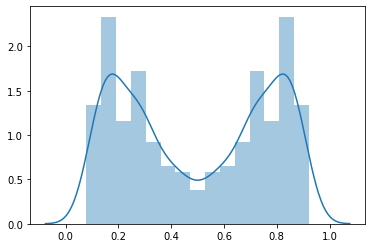

In [168]:
#data = sns.load_dataset("df")

#x = test_X
#y = y_prediction

sns.distplot(preds_1st, kde=True, hist=True)
#sns.distplot(y, kde=True, hist=False)

In [179]:
from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(test_y, y_prediction)

array([[   0, 1127],
       [   0, 1873]])

In [181]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_y, y_prediction).ravel()
tn, fp, fn, tp

(0, 1127, 0, 1873)

In [283]:
#y_prediction.replace({'N': 0,'Y': 1})

pred_y_num = []
pred_y_num = np.where(y_prediction == 'N', 0, y_prediction)
pred_y_num = np.where(y_prediction == 'Y', 1, y_prediction)

test_y_num = []
test_y_num = np.where(test_y == 'N', 0, test_y)
test_y_num = np.where(test_y_num == 'Y', 1, test_y_num)

#np.where(a < 5, a, 10*a)

# numpy.where(condition, [x, y, ]/)


In [103]:
from sklearn.metrics import confusion_matrix
TD_pred = clf_TD.predict(test_XTD)
tn, fp, fn, tp = confusion_matrix(test_ytd, TD_pred).ravel()
tn, fp, fn, tp

(2617, 4, 378, 1)

In [105]:
TD_modeled = model_TD.predict(test_XTD)
tn, fp, fn, tp = confusion_matrix(test_ytd, TD_modeled).ravel()
tn, fp, fn, tp

(1150, 1471, 143, 236)

In [64]:
import sklearn.pipeline
from sklearn.metrics import roc_curve, roc_auc_score
### call pipeline.predict() on your X_test data to make a set of test predictions
#y_prediction = model_jan.predict(test_X)

### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report(test_ytd, TD_pred)
print(report)

              precision    recall  f1-score   support

           N       0.87      1.00      0.93      2621
           Y       0.17      0.00      0.01       379

    accuracy                           0.87      3000
   macro avg       0.52      0.50      0.47      3000
weighted avg       0.78      0.87      0.81      3000



In [126]:
import sklearn.pipeline
from sklearn.metrics import roc_curve, roc_auc_score
### call pipeline.predict() on your X_test data to make a set of test predictions
#y_prediction = model_jan.predict(test_X)

### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report(test_ytd, TD_modeled)
print(report)

              precision    recall  f1-score   support

           N       0.89      0.44      0.59      2621
           Y       0.14      0.62      0.23       379

    accuracy                           0.46      3000
   macro avg       0.51      0.53      0.41      3000
weighted avg       0.79      0.46      0.54      3000



#### Convert String values to 1, 0 for metrics application

In [107]:
#y_prediction.replace({'N': 0,'Y': 1})

TD_pred_num = []
TD_pred_num = np.where(TD_pred == 'N', 0, TD_pred)
TD_pred_num = np.where(TD_pred_num == 'Y', 1, TD_pred_num)

TD_y_num = []
TD_y_num = np.where(test_ytd == 'N', 0, test_ytd)
TD_y_num = np.where(TD_y_num == 'Y', 1, TD_y_num)

TD_mod_num = []
TD_mod_num = np.where(TD_modeled == 'N', 0, TD_modeled)
TD_mod_num = np.where(TD_mod_num == 'Y', 1, TD_mod_num)


TD_y_num = TD_y_num.astype(int)
TD_pred_num = TD_pred_num.astype(int)
TD_mod_num = TD_mod_num.astype(int)

In [110]:
pd.value_counts(TD_mod_num)

1    1707
0    1293
dtype: int64

In [66]:
sklearn.metrics.f1_score(TD_y_num, TD_pred_num)

0.005194805194805195

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

#### Get data for ROC Curve

In [ ]:
# # Binarize the output
# y = label_binarize(y, classes=[0, 1])
# n_classes = y.shape[1]

In [119]:
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(TD_y_num[:], TD_pred_num[:])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(TD_y_num.ravel(), TD_pred_num.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [120]:
print(fpr["micro"])
print(tpr["micro"])
print(roc_auc["micro"])

[0.         0.00152614 1.        ]
[0.         0.00263852 1.        ]
0.5005561936822437


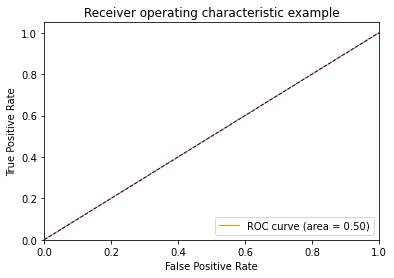

In [121]:
plt.figure()
lw = 1
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

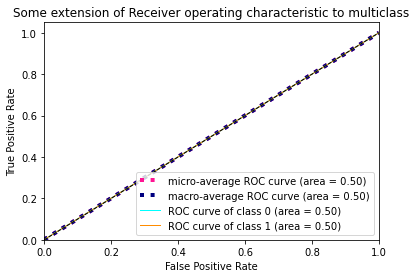

In [122]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [75]:
#y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(TD_y_num, ytd_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    TD_y_num, ytd_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(TD_y_num, ytd_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    TD_y_num, ytd_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.353811 (macro),
0.353811 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.353811 (macro),
0.353811 (weighted by prevalence)


In [72]:
ytd_prob = clf_TD.predict_proba(test_XTD)[:,0]

In [342]:
ytd_prob

array([0.89771313, 0.90897782, 0.89980558, ..., 0.87079839, 0.93114888,
       0.87769881])

In [333]:
clf_TD.predict_proba(test_XTD)

array([[0.89771313, 0.10228687],
       [0.90897782, 0.09102218],
       [0.89980558, 0.10019442],
       ...,
       [0.87079839, 0.12920161],
       [0.93114888, 0.06885112],
       [0.87769881, 0.12230119]])

HALF                0.000000
PLAYID_PASS7        0.006036
PLAYID_PASS8        0.006102
PLAYID_PASS4        0.006365
PLAYID_PASS5        0.006483
PLAYID_PASS9        0.007616
RUN_PASS_RUN        0.008098
TSHIRT_XLONG        0.009401
PLAYID_RUN2         0.009827
PLAYID_RUN5         0.011827
TSHIRT_LONG         0.013326
PLAYID_RUN1         0.013974
TSHIRT_MEDIUM       0.014842
TSHIRT_SMALL        0.015428
PLAYID_RUN3         0.020815
PLAYID_PASS6        0.030065
DOWNNUM             0.037533
YARDSTOGO           0.080955
SCOREDIFF           0.085585
YARDSGAINED_Mean    0.112487
TRUEFIELD           0.146174
TIMELEFT            0.148341
AVG_OVER_TOGO       0.208717
dtype: float64


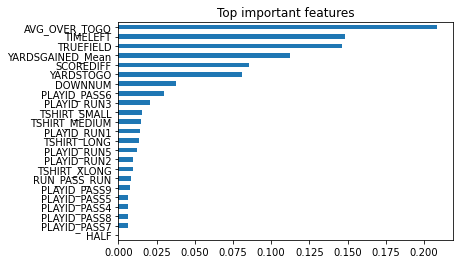

In [118]:
RF_features = pd.Series(data=clf_TD.feature_importances_,index=df_TD.columns)
RF_features.sort_values(ascending=True,inplace=True)
print(RF_features)

RF_features.plot(kind='barh')
plt.title("Top important features")
plt.show()

In [177]:
type(RF_features)

pandas.core.series.Series

#### For Logistic Regression model

In [123]:
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(TD_y_num[:], TD_mod_num[:])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(TD_y_num.ravel(), TD_mod_num.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

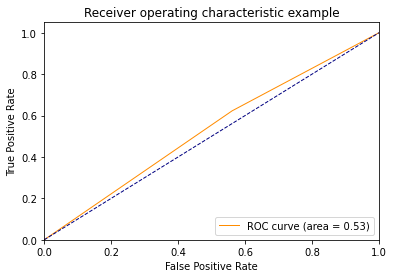

In [124]:
plt.figure()
lw = 1
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

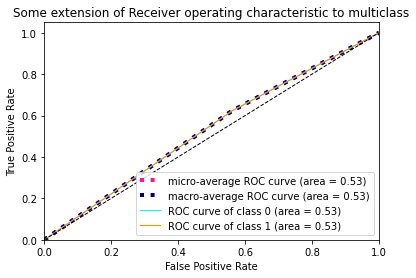

In [125]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [117]:
#y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(TD_y_num, TD_mod_num, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    TD_y_num, TD_mod_num, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(TD_y_num, TD_mod_num, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    TD_y_num, TD_mod_num, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.530728 (macro),
0.530728 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.530728 (macro),
0.530728 (weighted by prevalence)


In [180]:
df_TD.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'TRUEFIELD',
       'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'RUN_PASS_RUN', 'PLAYID_PASS4',
       'PLAYID_PASS5', 'PLAYID_PASS6', 'PLAYID_PASS7', 'PLAYID_PASS8',
       'PLAYID_PASS9', 'PLAYID_RUN1', 'PLAYID_RUN2', 'PLAYID_RUN3',
       'PLAYID_RUN5', 'TSHIRT_LONG', 'TSHIRT_MEDIUM', 'TSHIRT_SMALL',
       'TSHIRT_XLONG'],
      dtype='object')

In [172]:
LOGIT_features = pd.Series(data=model_1st.coef_,index=df_TD.columns)

ValueError: Length of passed values is 1, index implies 23.

In [179]:
model_1st.coef_

array([[ 0.        ,  0.26763274, -0.46438192,  0.02190892,  0.00922271,
         0.06418764,  0.26885396, -0.18852498,  0.07582917,  0.02037909,
         0.01925051, -0.03191909, -0.00593643, -0.02303145, -0.10531751,
         0.03543534,  0.02986327,  0.04992518,  0.00898956, -0.43713556,
         0.23425309,  0.39963758, -0.30979351]])

In [192]:
data

AttributeError: 'list' object has no attribute 'dtypes'

In [169]:
LOGIT_features = pd.Series(data=model_1st.feature_importances_,index=df_TD.columns)
LOGIT_features.sort_values(ascending=True,inplace=True)
print(LOGIT_features)

LOGIT_features.plot(kind='barh')
plt.title("Top important features")
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

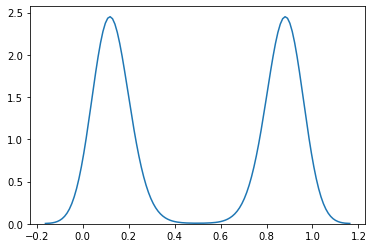

In [336]:
#data = sns.load_dataset("df")

y = ytd_prob

sns.distplot(y, kde=True, hist=False)

#### K-Folds Splitting and Cross Validation

In [206]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold

#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])

X = XTD_scaled
#X = df_TD.values
y = df['TARGET_1ST'].values

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=33)
for train_index, test_index in rskf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    


TRAIN: [   0    2    3 ... 9996 9998 9999] TEST: [   1    4   10 ... 9988 9990 9997]
TRAIN: [   0    1    2 ... 9996 9997 9999] TEST: [   6    7    8 ... 9970 9984 9998]
TRAIN: [   1    3    4 ... 9997 9998 9999] TEST: [   0    2   11 ... 9991 9992 9994]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   3    9   21 ... 9989 9993 9995]
TRAIN: [   0    1    2 ... 9995 9997 9998] TEST: [   5   13   15 ... 9985 9996 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   4    9   14 ... 9962 9970 9979]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   3    8   15 ... 9987 9991 9992]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [  12   13   16 ... 9976 9981 9996]
TRAIN: [   3    4    6 ... 9993 9994 9996] TEST: [   0    1    2 ... 9997 9998 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   6   10   22 ... 9990 9993 9994]


In [209]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/mod

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7578750000000001
